In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.misc

## Part2: FACE SVD

In [2]:
def removeMean(X):
    mean = X.mean(axis=0)
    return mean, X-mean

def addMean(X, mean):
    return X+mean

In [3]:
def PCA3D(X, k=0):
    mean, X = removeMean(X)
    U,S,V = np.linalg.svd(X)
    tr = sum(S)
    E = 100
    if not k:
        matS = np.zeros((X.shape[0], X.shape[1]))
        matS[:X.shape[0], :X.shape[0]] = np.diag(S)
        reconstm = U@matS@V
        reconstm = addMean(reconstm, mean)
        return E, reconstm.astype('uint8')
    else:
        sumSK = sum(S[:k])
        E = (sumSK/tr)*100
        reconstm = np.dot(U[:,:k],np.dot(np.diag(S[:k]),V[:k,:]))
        reconstm = addMean(reconstm, mean)
        return E, reconstm.astype('uint8')

In [4]:
def arr2channel(mat):
    #return mat.transpose(2,0,1).reshape(3,-1)
    return mat.transpose(2,0,1)


def channel2arr(mat):
    #return mat.reshape(3,4,2).transpose(1,2,0)
    return mat.transpose(1,2,0)

In [5]:
face = scipy.misc.face().copy()

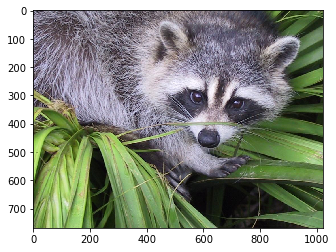

In [6]:
plt.gray()
plt.imshow(face)
plt.show()

In [7]:
clipped1 = face[:][0+200:249+200]
clipped1.setflags(write=1)

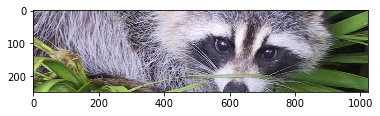

In [11]:
plt.gray()
plt.imshow(clipped1)
fig1 = plt.gcf()
fig1.savefig("clipped.png", dpi=100)
plt.show()

In [12]:
channels = arr2channel(clipped1)

### k = all

In [13]:
E1,red = PCA3D(channels[0])
E2,green = PCA3D(channels[1])
E3,blue = PCA3D(channels[2])

In [18]:
reconst = np.array([red,green,blue])
print("Energy at k = all:",(E1+E2+E3)/3)

Energy at k = all: 100.0


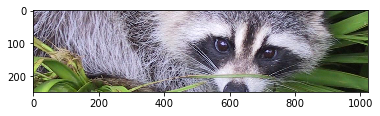

In [16]:
result = channel2arr(reconst)
plt.imshow(result)
fig2 = plt.gcf()
fig2.savefig("k_all.png", dpi=100)

### k =120

In [19]:
k = 120
E1,red = PCA3D(channels[0],k)
E2,green = PCA3D(channels[1],k)
E3,blue = PCA3D(channels[2],k)

In [20]:
reconst = np.array([red,green,blue])
print("Energy at k = 120: ",(E1+E2+E3)/3)

Energy at k = 120:  91.5809662184126


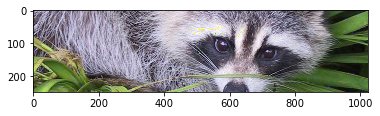

In [21]:
result = channel2arr(reconst)
plt.imshow(result)
fig3 = plt.gcf()
fig3.savefig("k_120.png", dpi=100)

### k = 50

In [22]:
k = 50
E1,red = PCA3D(channels[0],k)
E2,green = PCA3D(channels[1],k)
E3,blue = PCA3D(channels[2],k)

In [23]:
reconst = np.array([red,green,blue])
print("Energy at k = 50: ",(E1+E2+E3)/3)

Energy at k = 50:  65.6156236297417


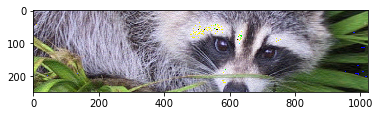

In [24]:
result = channel2arr(reconst)
plt.imshow(result)
fig3 = plt.gcf()
fig3.savefig("k_50.png", dpi=100)

### k = 10

In [37]:
k = 10
E1,red = PCA3D(channels[0],k)
E2,green = PCA3D(channels[1],k)
E3,blue = PCA3D(channels[2],k)

In [38]:
reconst = np.array([red,green,blue])
print("Energy at k = 10: ",(E1+E2+E3)/3)

Energy at k = 10:  32.34516017815806


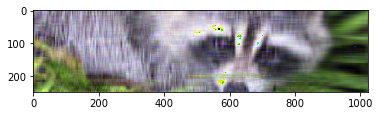

In [39]:
result = channel2arr(reconst)
plt.imshow(result)
fig3 = plt.gcf()
fig3.savefig("k_10.png", dpi=100)

### Finding truncation error less than 1%

In [40]:
k = 192
E1,red = PCA3D(channels[0],k)
E2,green = PCA3D(channels[1],k)
E3,blue = PCA3D(channels[2],k)
reconst = np.array([red,green,blue])
print("Energy at k = {0}: {1}".format(k, (E1+E2+E3)/3))

Energy at k = 192: 99.00120464636814


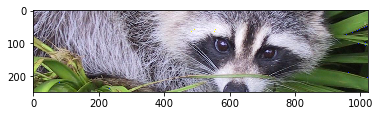

In [41]:
result = channel2arr(reconst)
plt.imshow(result)
fig3 = plt.gcf()
fig3.savefig("k_192.png", dpi=100)